In [91]:
%run to_import.py
%matplotlib inline

In [2]:
segm_set=range(1,13)
data_folder='../../Data_Raw'
data_small='../../Data_Small_Tables'

In [3]:
#download k and s12 parameters
table_s12_k=pd.read_csv(data_small+'/table_s12_k_with_nons.csv',sep='\t',index_col=0)

## wt

In [4]:
wt_seq=pd.read_csv(data_small+'/wt_seq.csv',sep='\t',index_col=0)

In [11]:
#extract wt data from nucleotyde table. first time.
replicas_all=range(13)
replicas_wt=range(13)
for s in segm_set:
    replicas_all[s]=pd.read_csv(data_folder+'/S'+str(s)+'_merged_filtered_sum_10_size_4_with_fr.csv',sep='\t',index_col=0)
    replicas_wt[s]=replicas_all[s][replicas_all[s]['aa_seq']==wt_seq.loc['S'+str(s),'aa_seq']]
    replicas_wt[s].to_csv(data_folder+'/S'+str(s)+'_merged_filtered_sum_10_size_4_with_fr_wt.csv',sep='\t')

In [5]:
#download wt nucleotide data
replicas_wt=range(13)
for s in segm_set:
    replicas_wt[s]=pd.read_csv(data_folder+'/S'+str(s)+'_merged_filtered_sum_10_size_4_with_fr_wt.csv',sep='\t',index_col=0)

In [6]:
#just some statistics
for s in segm_set:
    print 'S'+str(s)
    print np.sort(replicas_wt[s]['t0_fr']+replicas_wt[s]['t1_fr']+replicas_wt[s]['t2_fr'])

S1
[  1.78340101e+00   2.65371224e+00   3.69911323e+00   3.77582405e+00
   4.21993196e+00   4.65802875e+00   3.16761450e+03]
S2
[  8.13647653e+00   1.30821850e+01   1.57659045e+01   1.34775513e+04]
S3
[  1.44039293e+00   1.97306207e+00   2.14213481e+00   2.84953943e+00
   3.04170260e+00   3.90501697e+00   5.87976701e+00   2.51589778e+03]
S4
[  1.05979559e+00   1.46758314e+00   1.75473720e+00   2.36922156e+00
   2.62281573e+00   2.99471663e+00   3.24175322e+00   3.07898933e+03]
S5
[  1.30408805e+00   3.57727164e+00   1.29473233e+04]
S6
[  3.00761051e+00   4.16690794e+00   1.71013623e+01   2.62882196e+01
   4.10444973e+01   7.56469500e+03]
S7
[   1.58582526    3.52971409    3.83564071   11.96611088   12.17219812
   14.89526899   15.67027929   19.66578128   31.5627434    37.90389908
   46.53424981   64.84782232  163.59715552]
S8
[  5.62860272e+00   7.62587024e+00   1.65280510e+01   2.78882542e+01
   2.86868786e+01   7.81564635e+01   1.30699055e+02   2.29103003e+02
   2.11473986e+04]
S9
[ 

In cell above we could notice that for all segments except S7 and S9 one of nucleotyde genotypes is several fold over represented. Therefore averaging them together we loose all information from less frequent variants. I will do averaging of everything except most frequent. For most frequent will treat all replicas independently. 

In [7]:
#calculate fitness for 
# 1) all summed together (equivalent to "s" from aa_all)
# 2) all but the one with highest (t0+t1+t2)_fr summed together - will use this value
# 3) each replica separately for one with highest (t0+t1+t2)_fr
wt_fitness=range(13)
#combine data into wt_fitness table
for s in segm_set:
    wt_fitness[s]=pd.DataFrame(columns=['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var'])
    wt_fitness[s].loc['avg_all']=replicas_wt[s][['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var']].sum()
    
    wt_fitness[s].loc['avg']=replicas_wt[s][(replicas_wt[s]['t0_fr']!=max(replicas_wt[s]['t0_fr']))]\
                [['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var']].sum()

    for tech in [1,2]:
        for bio in [1,2]:
            wt_fitness[s].loc['tech'+str(tech)+'_bio'+str(bio)]=replicas_wt[s][replicas_wt[s]['t0_fr']==max(replicas_wt[s]['t0_fr'])]\
            [['t0_tech'+str(tech)+'_bio'+str(bio)+'_fr','t1_tech'+str(tech)+'_bio'+str(bio)+'_fr','t2_tech'+str(tech)+'_bio'+str(bio)+'_fr',\
              't0_fr_var','t1_fr_var','t2_fr_var']].\
            rename(columns={\
            't0_tech'+str(tech)+'_bio'+str(bio)+'_fr':'t0_fr','t1_tech'+str(tech)+'_bio'+str(bio)+'_fr':'t1_fr',\
            't2_tech'+str(tech)+'_bio'+str(bio)+'_fr':'t2_fr'}).iloc[0]
#fitness calculation            
for s in segm_set:
    data=wt_fitness[s][['t0_fr','t1_fr','t2_fr']].values.copy()
    data_sigma=np.sqrt(wt_fitness[s][['t0_fr_var','t1_fr_var','t2_fr_var']].values.copy())
    
    s12=table_s12_k.loc['S'+str(s),'s12']
    k=table_s12_k.loc['S'+str(s),'k']
    
    y0,si,y0_std,s_std,residuals=func_fit_single_exponents(data,data_sigma,s12,k)
    wt_fitness[s]['y0']=y0
    wt_fitness[s]['s']=si
    wt_fitness[s]['y0_std']=y0_std
    wt_fitness[s]['s_std']=s_std
    wt_fitness[s]['residuals']=residuals

C:\Users\dina\Anaconda2\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


## Nonsense

In [82]:
#download data
aa_all=range(13)
for s in segm_set:
    aa_all[s]=pd.read_csv(data_folder+'/S'+str(s)+'_sum_10_size_4_with_nons_aa_avg.csv',sep='\t',index_col=0)   

In [83]:
#label nonsense
for s in segm_set:
    aa_all[s]['nonsense']=0
    aa_all[s].loc[aa_all[s]['aa_seq'].map(lambda x: x.count('_'))>0,'nonsense']=1

In [60]:
statistics=pd.DataFrame()
for s in segm_set:
    for nons,boun,name in [[0,0,'good_value'],[1,0,'nonsense_value'],[0,1,'good_boundary'],[1,1,'nonsense_boundary']]:
        statistics.set_value('S'+str(s),name,len(aa_all[s][(aa_all[s]['nonsense']==nons)&(aa_all[s]['boundary']==boun)]))
    statistics.set_value('S'+str(s),'s is nan',len(aa_all[s][pd.isnull(aa_all[s]['s'])]))
statistics

,good_value,nonsense_value,good_boundary,nonsense_boundary,s is nan
S1,63120.0,62872.0,7.0,88.0,0.0
S2,84822.0,36169.0,575.0,1661.0,1.0
S3,73259.0,21741.0,31.0,75.0,2.0
S4,65263.0,3972.0,7.0,3.0,0.0
S5,76192.0,24196.0,12.0,121.0,0.0
S6,66466.0,16900.0,259.0,413.0,0.0
S7,16619.0,9747.0,0.0,11.0,0.0
S8,60291.0,12656.0,425.0,434.0,0.0
S9,72531.0,1241.0,9919.0,1092.0,0.0
S10,65399.0,11496.0,237.0,3303.0,1.0


In [61]:
#calculate fitness for all nonsense summed together
nonsense_fitness=pd.DataFrame(columns=['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var'])
for s in segm_set:
    nonsense_fitness.loc['S'+str(s)]=aa_all[s][(aa_all[s]['nonsense']==1)]\
            [['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var']].sum()

for s in segm_set:
    mask=nonsense_fitness.iloc[s-1:s]
    data=mask[['t0_fr','t1_fr','t2_fr']].values.copy()
    data_sigma=np.sqrt(mask[['t0_fr_var','t1_fr_var','t2_fr_var']].values.copy())
    s12=table_s12_k.loc['S'+str(s),'s12']
    k=table_s12_k.loc['S'+str(s),'k']
    
    y0,si,y0_std,s_std,residuals=func_fit_single_exponents(data,data_sigma,s12,k)
    nonsense_fitness.loc['S'+str(s),'y0']=y0[0]
    nonsense_fitness.loc['S'+str(s),'s']=si[0]
    nonsense_fitness.loc['S'+str(s),'y0_std']=y0_std[0]
    nonsense_fitness.loc['S'+str(s),'s_std']=s_std[0]
    nonsense_fitness.loc['S'+str(s),'residuals']=residuals[0]

In [62]:
nonsense_fitness;

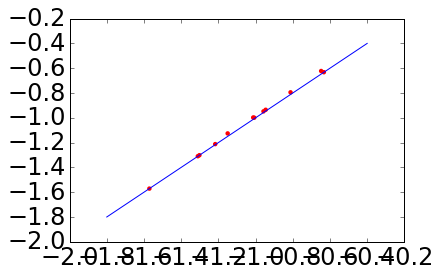

In [63]:
mask1=nonsense_fitness
plt.scatter(np.log((mask1['t1_fr'])/(mask1['t0_fr'])),mask1['s'],s=20,edgecolor='',c='r')
plt.plot(np.arange(-1.8,-0.3,0.1),np.arange(-1.8,-0.3,0.1),c='b')

nonsense fitness s is defined only by w01 

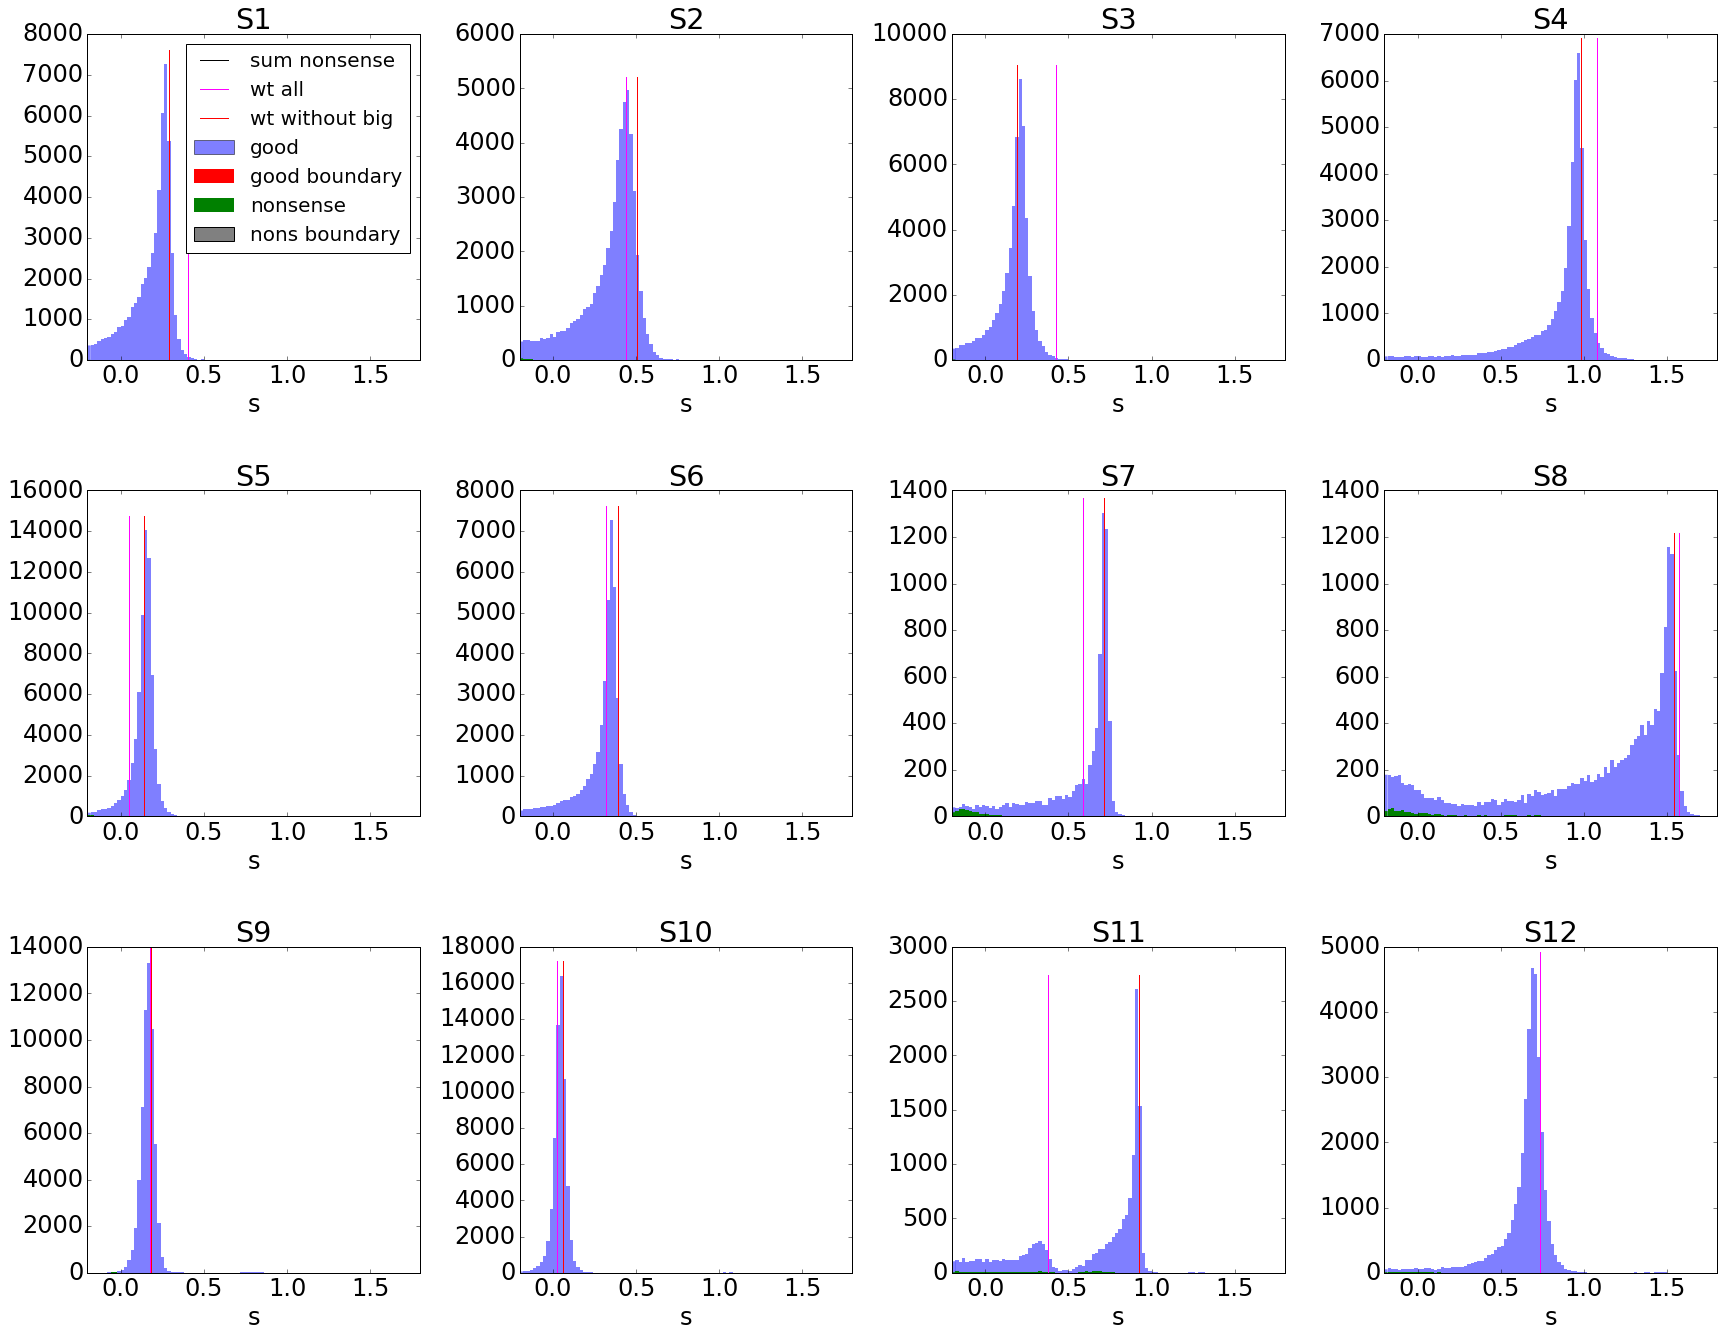

In [64]:
#histogram of fitness values with nonsense and wt
fig=plt.figure(figsize=(4*7.3,3*7.4))
plt.rcParams.update({'font.size': 24,'legend.fontsize': 20})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)
count=1
ranges=(-0.2,1.8)
bins=100
for s in segm_set:
    plt.subplot(3,4,count)
    mask=aa_all[s][(aa_all[s]['nonsense']==0)&(aa_all[s]['boundary']==0)]
    a,b,c=plt.hist(mask['s'],range=ranges,bins=bins,alpha=0.5,edgecolor='none',color='b',label='good')
    mask=aa_all[s][(aa_all[s]['nonsense']==0)&(aa_all[s]['boundary']==1)]
    plt.hist(mask['s'],range=ranges,bins=bins,edgecolor='none',color='r',label='good boundary')
    
    mask=aa_all[s][(aa_all[s]['nonsense']==1)&(aa_all[s]['boundary']==0)]
    plt.hist(mask['s'],range=ranges,bins=bins,edgecolor='none',color='g',label='nonsense')
    mask=aa_all[s][(aa_all[s]['nonsense']==1)&(aa_all[s]['boundary']==1)]
    plt.hist(mask['s'],range=ranges,bins=bins,alpha=1,edgecolor='none',color='grey',label='nons boundary')
    plt.title('S'+str(s))
    plt.xlabel('s')
    plt.plot([nonsense_fitness.loc['S'+str(s),'s'],nonsense_fitness.loc['S'+str(s),'s']],[0,max(a)],c='black',label='sum nonsense')
    plt.plot([wt_fitness[s].loc['avg_all','s'],wt_fitness[s].loc['avg_all','s']],[0,max(a)*1.05],c='magenta',label='wt all')
    plt.plot([wt_fitness[s].loc['avg','s'],wt_fitness[s].loc['avg','s']],[0,max(a)*1.05],c='r',label='wt without big')
    if (s==1):
        plt.legend(loc=1)
    count+=1
    plt.xlim(-0.2,1.8)

Conclusion: I will use avg (without biggest) for all segments except S12, because it has only one wt

## Control

In [65]:
#download control
control_all=pd.read_csv(data_small+'/control.csv',sep='\t')

In [66]:
control=pd.DataFrame()
for s in segm_set:
    mask=control_all[control_all['#library']==str(s)]
    mask=mask.merge(aa_all[s],how='left',on='aa_seq')
    control=control.append(mask,ignore_index=True)
    

In [67]:
control['#library']=control['#library'].map(lambda x: int(x))

In [68]:
print np.mean(control_all[control_all['#library']=='wt']['mean'])
print np.median(control_all[control_all['#library']=='wt']['mean'])

0.453710588235
0.45832


In [69]:
wt_abs_fitness=np.mean(control_all[control_all['#library']=='wt']['mean'])

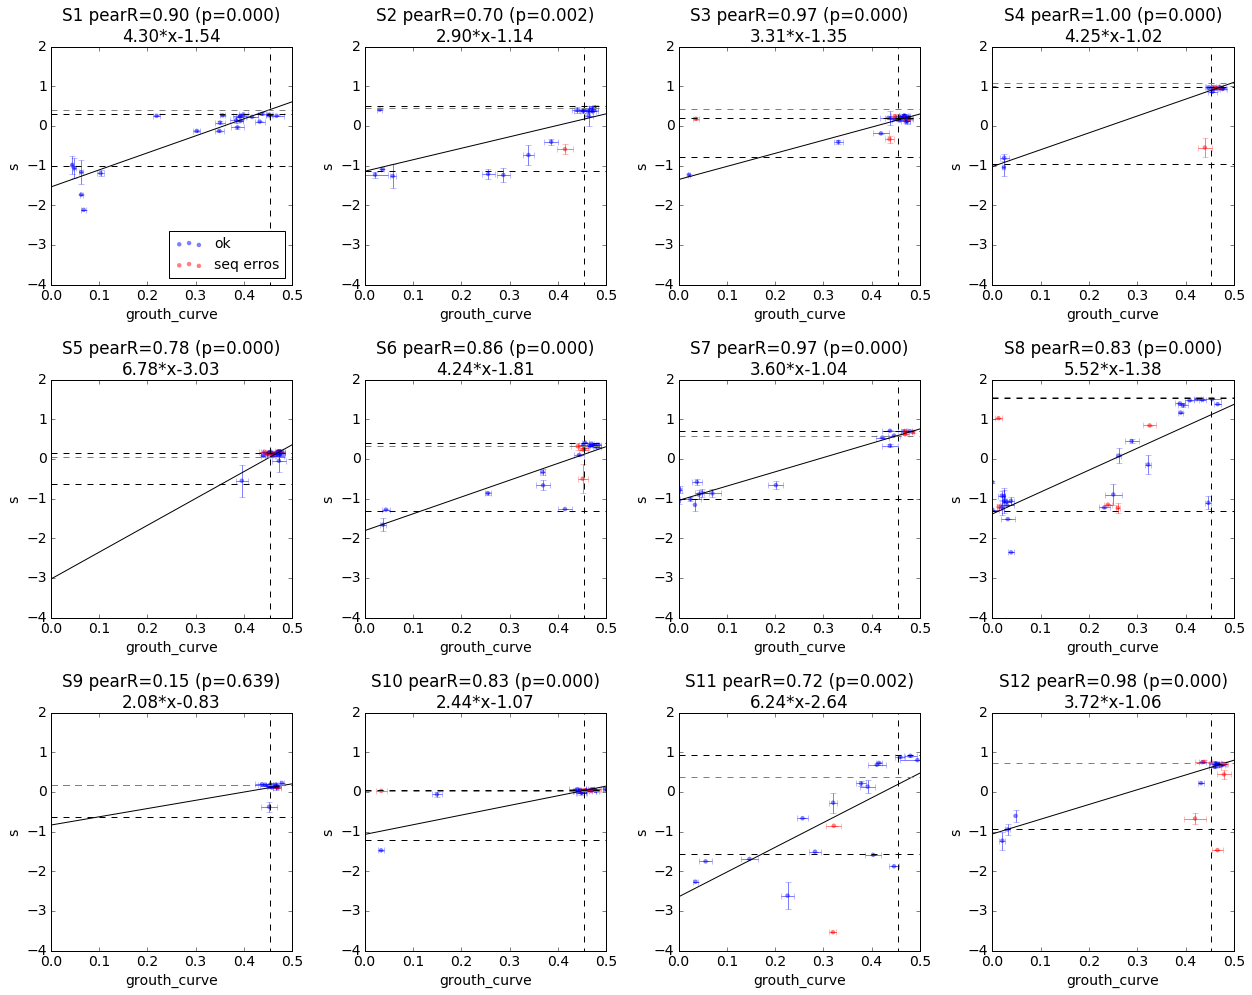

In [70]:

fig=plt.figure(figsize=(4*5.3,3*5.4))
plt.rcParams.update({'font.size': 14,'legend.fontsize': 14})
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

f_name='s'
thr_s_std=0.5
growth_rate_statistics=pd.DataFrame()
for s in range(1,13):
    plt.subplot(3,4,s)
    mask_bad=control[(control['#library']==s)&(pd.notnull(control[f_name]))&(pd.notnull(control['mean']))\
                      &(control[f_name]!=-np.inf)&(pd.notnull(control['Comments']))]
    mask_good=control[(control['#library']==s)&(pd.notnull(control[f_name]))&(pd.notnull(control['mean']))\
                        &(control[f_name]!=-np.inf)&(pd.isnull(control['Comments']))&(control['s_std']<=thr_s_std)]
    mask_good_bad=control[(control['#library']==s)&(pd.notnull(control[f_name]))&(pd.notnull(control['mean']))\
                        &(control[f_name]!=-np.inf)&(pd.isnull(control['Comments']))&(control['s_std']>thr_s_std)]
    pear=stats.pearsonr(mask_good['mean'],mask_good[f_name])
    #print s,len(mask_good),len(mask_bad),len(mask_good_bad)
    for mask_for_plot,label_name,color in [[mask_good,'ok','b'],[mask_bad,'seq erros','r']]: #,[mask_good_bad,'s_std>0.5','g']
        plt.scatter(mask_for_plot['mean'],mask_for_plot[f_name],edgecolor='none',alpha=0.5,c=color,label=label_name)
        plt.errorbar(mask_for_plot['mean'].values,mask_for_plot[f_name].values,\
                     xerr=mask_for_plot['sem'].values,yerr=mask_for_plot['s_std'].values,\
                     fmt='none',alpha=0.5,ecolor=color,label='none')
    
    if (s==1):
        plt.legend(['ok','seq erros'],loc=4) #'s_std>'+str(thr_s_std)
   
    #fit
    ([k,b],cov)=np.polyfit(mask_good['mean'].values,mask_good[f_name].values,1,cov=True)
    for i1,i2 in [['k',k],['b',b],['k_std',np.sqrt(cov[0,0])],['b_std',np.sqrt(cov[1,1])],['pearR',pear[0]],['p-value',pear[1]]]:
        growth_rate_statistics.set_value('S'+str(s),i1,i2)
    #plot fit
    plt.plot(np.arange(0,0.51,0.01),map(lambda x:k*x+b,np.arange(0,0.51,0.01)),c='black',label='fit')
    
    #plot wt growth rate
    plt.plot([wt_abs_fitness,wt_abs_fitness],[-5,2],'--',c='black',label='wt')
    
    #plot competition nonsense and wt
    plt.plot([0,0.6],[nonsense_fitness.loc['S'+str(s),'s'],\
                      nonsense_fitness.loc['S'+str(s),'s']],'--',c='black')
    plt.plot([0,0.6],[wt_fitness[s].loc['avg','s'],\
                      wt_fitness[s].loc['avg','s']],'--',c='black')
    plt.plot([0,0.6],[wt_fitness[s].loc['avg_all','s'],\
                      wt_fitness[s].loc['avg_all','s']],'--',c='grey')
    
    plt.xlabel('grouth_curve')
    plt.ylabel(f_name)
    plt.title('S'+str(s)+' pearR=%.2f (p=%.3f)\n%.2f*x%.2f' %(pear[0],pear[1],k,b))
    plt.xlim(0,0.5)
    plt.ylim(-4,2)

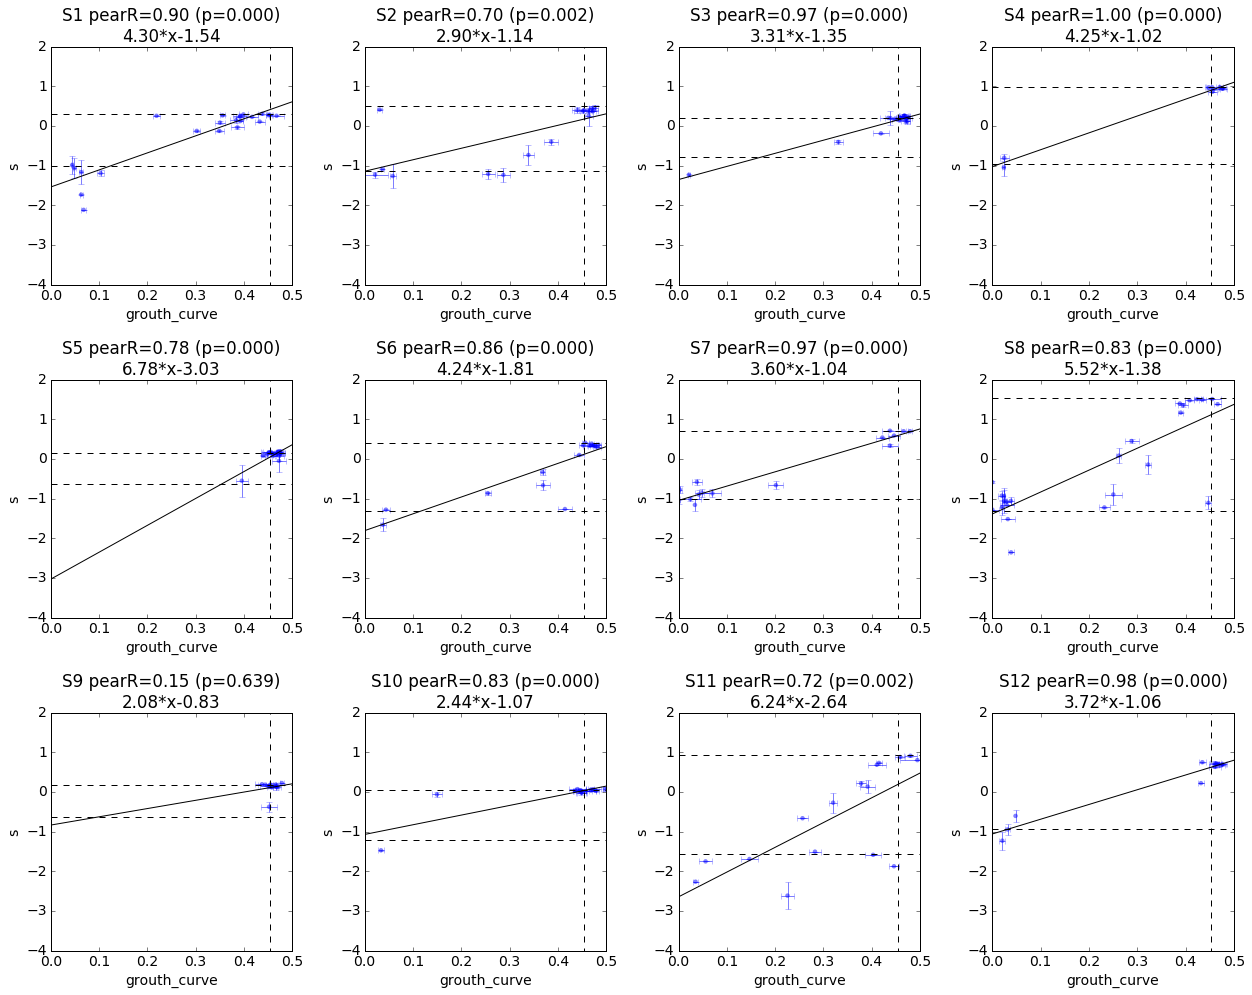

In [71]:

fig=plt.figure(figsize=(4*5.3,3*5.4))
plt.rcParams.update({'font.size': 14,'legend.fontsize': 14})
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

f_name='s'
thr_s_std=0.5
growth_rate_statistics=pd.DataFrame()
for s in range(1,13):
    plt.subplot(3,4,s)
    mask_bad=control[(control['#library']==s)&(pd.notnull(control[f_name]))&(pd.notnull(control['mean']))\
                      &(control[f_name]!=-np.inf)&(pd.notnull(control['Comments']))]
    mask_good=control[(control['#library']==s)&(pd.notnull(control[f_name]))&(pd.notnull(control['mean']))\
                        &(control[f_name]!=-np.inf)&(pd.isnull(control['Comments']))&(control['s_std']<=thr_s_std)]
    mask_good_bad=control[(control['#library']==s)&(pd.notnull(control[f_name]))&(pd.notnull(control['mean']))\
                        &(control[f_name]!=-np.inf)&(pd.isnull(control['Comments']))&(control['s_std']>thr_s_std)]
    pear=stats.pearsonr(mask_good['mean'],mask_good[f_name])
    #print s,len(mask_good),len(mask_bad),len(mask_good_bad)
    for mask_for_plot,label_name,color in [[mask_good,'ok','b']]:#,[mask_bad,'seq erros','r']]: #,[mask_good_bad,'s_std>0.5','g']
        plt.scatter(mask_for_plot['mean'],mask_for_plot[f_name],edgecolor='none',alpha=0.5,c=color,label=label_name)
        plt.errorbar(mask_for_plot['mean'].values,mask_for_plot[f_name].values,\
                     xerr=mask_for_plot['sem'].values,yerr=mask_for_plot['s_std'].values,\
                     fmt='none',alpha=0.5,ecolor=color,label='none')
    
    #if (s==1):
    #    plt.legend(['ok','seq erros'],loc=4) #'s_std>'+str(thr_s_std)
   
    #fit
    ([k,b],cov)=np.polyfit(mask_good['mean'].values,mask_good[f_name].values,1,cov=True)
    for i1,i2 in [['k',k],['b',b],['k_std',np.sqrt(cov[0,0])],['b_std',np.sqrt(cov[1,1])],['pearR',pear[0]],['p-value',pear[1]]]:
        growth_rate_statistics.set_value('S'+str(s),i1,i2)
    #plot fit
    plt.plot(np.arange(0,0.51,0.01),map(lambda x:k*x+b,np.arange(0,0.51,0.01)),c='black',label='fit')
    
    #plot wt growth rate
    plt.plot([wt_abs_fitness,wt_abs_fitness],[-5,2],'--',c='black',label='wt')
    
    #plot competition nonsense and wt
    plt.plot([0,0.6],[nonsense_fitness.loc['S'+str(s),'s'],\
                      nonsense_fitness.loc['S'+str(s),'s']],'--',c='black')
    plt.plot([0,0.6],[wt_fitness[s].loc['avg','s'],\
                      wt_fitness[s].loc['avg','s']],'--',c='black')
    #plt.plot([0,0.6],[wt_fitness[s].loc['avg_all','s'],\
    #                  wt_fitness[s].loc['avg_all','s']],'--',c='grey')
    
    plt.xlabel('grouth_curve')
    plt.ylabel(f_name)
    plt.title('S'+str(s)+' pearR=%.2f (p=%.3f)\n%.2f*x%.2f' %(pear[0],pear[1],k,b))
    plt.xlim(0,0.5)
    plt.ylim(-4,2)

In [72]:
growth_rate_statistics

,k,b,k_std,b_std,pearR,p-value
S1,4.298289,-1.537711,0.472556,0.159955,0.901798,4.215218e-09
S2,2.895747,-1.141511,0.828811,0.307734,0.695896,1.919127e-03
S3,3.306507,-1.350863,0.227620,0.099965,0.970551,1.110577e-10
S4,4.247995,-1.023242,0.184155,0.075252,0.995335,2.273451e-08
S5,6.779164,-3.028285,1.431878,0.659737,0.784566,1.156618e-04
S6,4.237600,-1.806141,0.730691,0.300087,0.858508,2.076870e-05
S7,3.604406,-1.043736,0.257881,0.074771,0.972982,1.177425e-09
S8,5.521569,-1.384566,0.819910,0.231900,0.826743,3.511464e-07
S9,2.080665,-0.831904,4.814489,2.205147,0.151041,6.393736e-01
S10,2.436585,-1.068318,0.499390,0.214302,0.827019,1.428374e-04


In [2]:
(0.9+0.70+0.97+0.996+0.785+0.86+0.973+0.827+0.15+0.83+0.72+0.976)/12.

0.8072500000000001

In [73]:
table_s12_k

,k,s12
S1,4.65,0.145
S2,4.45,0.270
S3,5.30,0.135
S4,4.45,0.615
S5,6.05,0.110
S6,6.15,0.260
S7,4.45,0.450
S8,4.45,1.030
S9,13.95,0.150
S10,6.55,0.035


S1 (0.94202086319692713, 1.9964305416806881e-11)
S2 (0.69371943632766353, 0.0020102169425094637)
S3 (0.92359615524300731, 1.2333605169612769e-07)
S4 (0.99695746201221536, 5.1000886427974972e-09)
S5 (0.78456607386433197, 0.00011566182061904386)
S6 (0.83295273669333358, 6.181753447297931e-05)
S7 (0.97545043637281026, 6.3543178310561675e-10)
S8 (0.83902344798123141, 8.5694991154069186e-08)
S9 (0.15104128821865181, 0.63937364756522586)
S10 (0.83410584784524322, 0.00011081996924707634)
S11 (0.70553553996059981, 0.0010711998599848302)
S12 (0.98061476950899806, 2.086997255732052e-08)


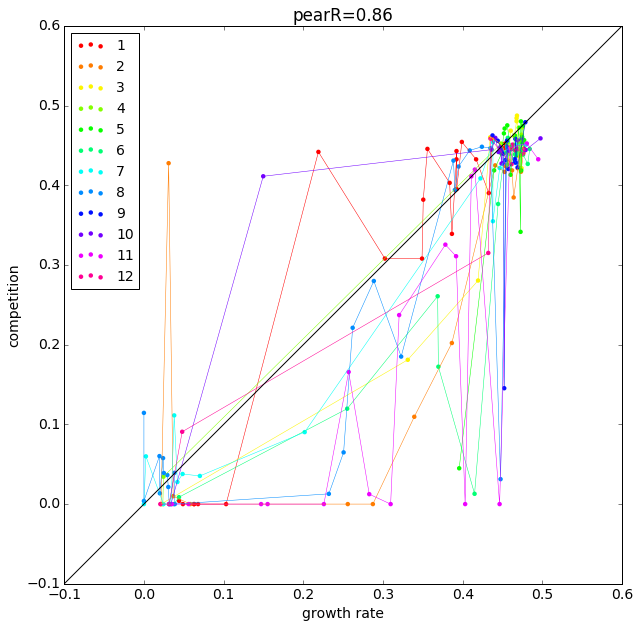

In [74]:
plt.figure(figsize=(10,10))
number = 13
cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
tmp1=[]
tmp2=[]
for s in range(1,13):
    mask=control[(control['#library']==s)&(pd.notnull(control['s']))&(pd.notnull(control['mean']))\
                        &(control[f_name]!=-np.inf)&(pd.isnull(control['Comments']))].sort_values(by='mean')
    nons=nonsense_fitness.loc['S'+str(s)]['s']
    if (s==12):
        wt=wt_fitness[s].loc['avg_all','s']
    else:
        wt=wt_fitness[s].loc['avg','s']
    tmp1.extend(mask['mean'])
    tmp2.extend(map(lambda x:max(0,x),(mask['s']-nons)/(wt-nons)*wt_abs_fitness))
    plt.scatter(mask['mean'],map(lambda x:max(0,x),(mask['s']-nons)/(wt-nons)*wt_abs_fitness),\
                c=colors[s-1],edgecolor='none',label=s)
    plt.plot(mask['mean'],map(lambda x:max(0,x),(mask['s']-nons)/(wt-nons)*wt_abs_fitness),\
              c=colors[s-1],linewidth=0.5,label=None)
    print 'S'+str(s),stats.pearsonr(mask['mean'],map(lambda x:max(0,x),(mask['s']-nons)/(wt-nons)*wt_abs_fitness))
   
        #plt.errorbar(mask_for_plot['mean_2'].values,mask_for_plot[f_name].values,\
        #             xerr=mask_for_plot['sem_2'].values,yerr=mask_for_plot['s_std'].values,\
        #             fmt='none',alpha=0.5,c=color,label='none')
plt.xlim(-0.1,0.6)
plt.ylim(-0.1,0.6)
plt.plot([-1,1],[-1,1],c='black')
plt.legend(loc=2)
plt.xlabel('growth rate')
plt.ylabel('competition')
plt.title('pearR=%.2f' %(stats.pearsonr(tmp1,tmp2)[0]))

## Scale

In [75]:
#download data
#aa_all=range(13)
#for s in segm_set:
#    aa_all[s]=pd.read_csv(data_folder+'/S'+str(s)+'_sum_10_size_4_with_nons_aa_avg.csv',sep='\t',index_col=0)   

In [84]:
#change wt
for s in [1,2,3,4,5,6,7,8,9,10,11]:
    index=aa_all[s][aa_all[s]['aa_seq']==wt_seq.loc['S'+str(s),'aa_seq']].index[0]
    for name in wt_fitness[1].columns.values:
        aa_all[s].set_value(index,name,wt_fitness[s].loc['avg',name])

In [85]:
#scale s and s_std
for s in segm_set:
    aa_all[s]['s_original']=aa_all[s]['s']
    aa_all[s]['s_std_original']=aa_all[s]['s_std']
    nons=nonsense_fitness.loc['S'+str(s)]['s']
    if (s==12):
        wt=wt_fitness[s].loc['avg_all','s']
    else:
        wt=wt_fitness[s].loc['avg','s']
        
    aa_all[s]['s']=(aa_all[s]['s']-nons)/(wt-nons)*wt_abs_fitness
    aa_all[s]['s_std']=aa_all[s]['s_std']/(wt-nons)*wt_abs_fitness
    aa_all[s]['s_std']=np.where(aa_all[s]['s']<=0,map(lambda x: max(0,x),aa_all[s]['s_std']+aa_all[s]['s']),aa_all[s]['s_std'])
    aa_all[s]['s']=aa_all[s]['s'].map(lambda x: max(0,x))

In [86]:
#filter that s_std<0.5
for s in segm_set:
    aa_all[s]=aa_all[s][(aa_all[s]['boundary']==1)|(aa_all[s]['s_std']<0.5)]

In [87]:
#check that all boundary==1 are has s=0 now
for s in segm_set:
    print len(aa_all[s][(aa_all[s]['boundary']==1)&(aa_all[s]['s']!=0)])

0
0
0
0
0
0
0
0
0
0
0
0


In [88]:
for s in segm_set:
    aa_all[s].drop(['boundary'],axis=1,inplace=True)

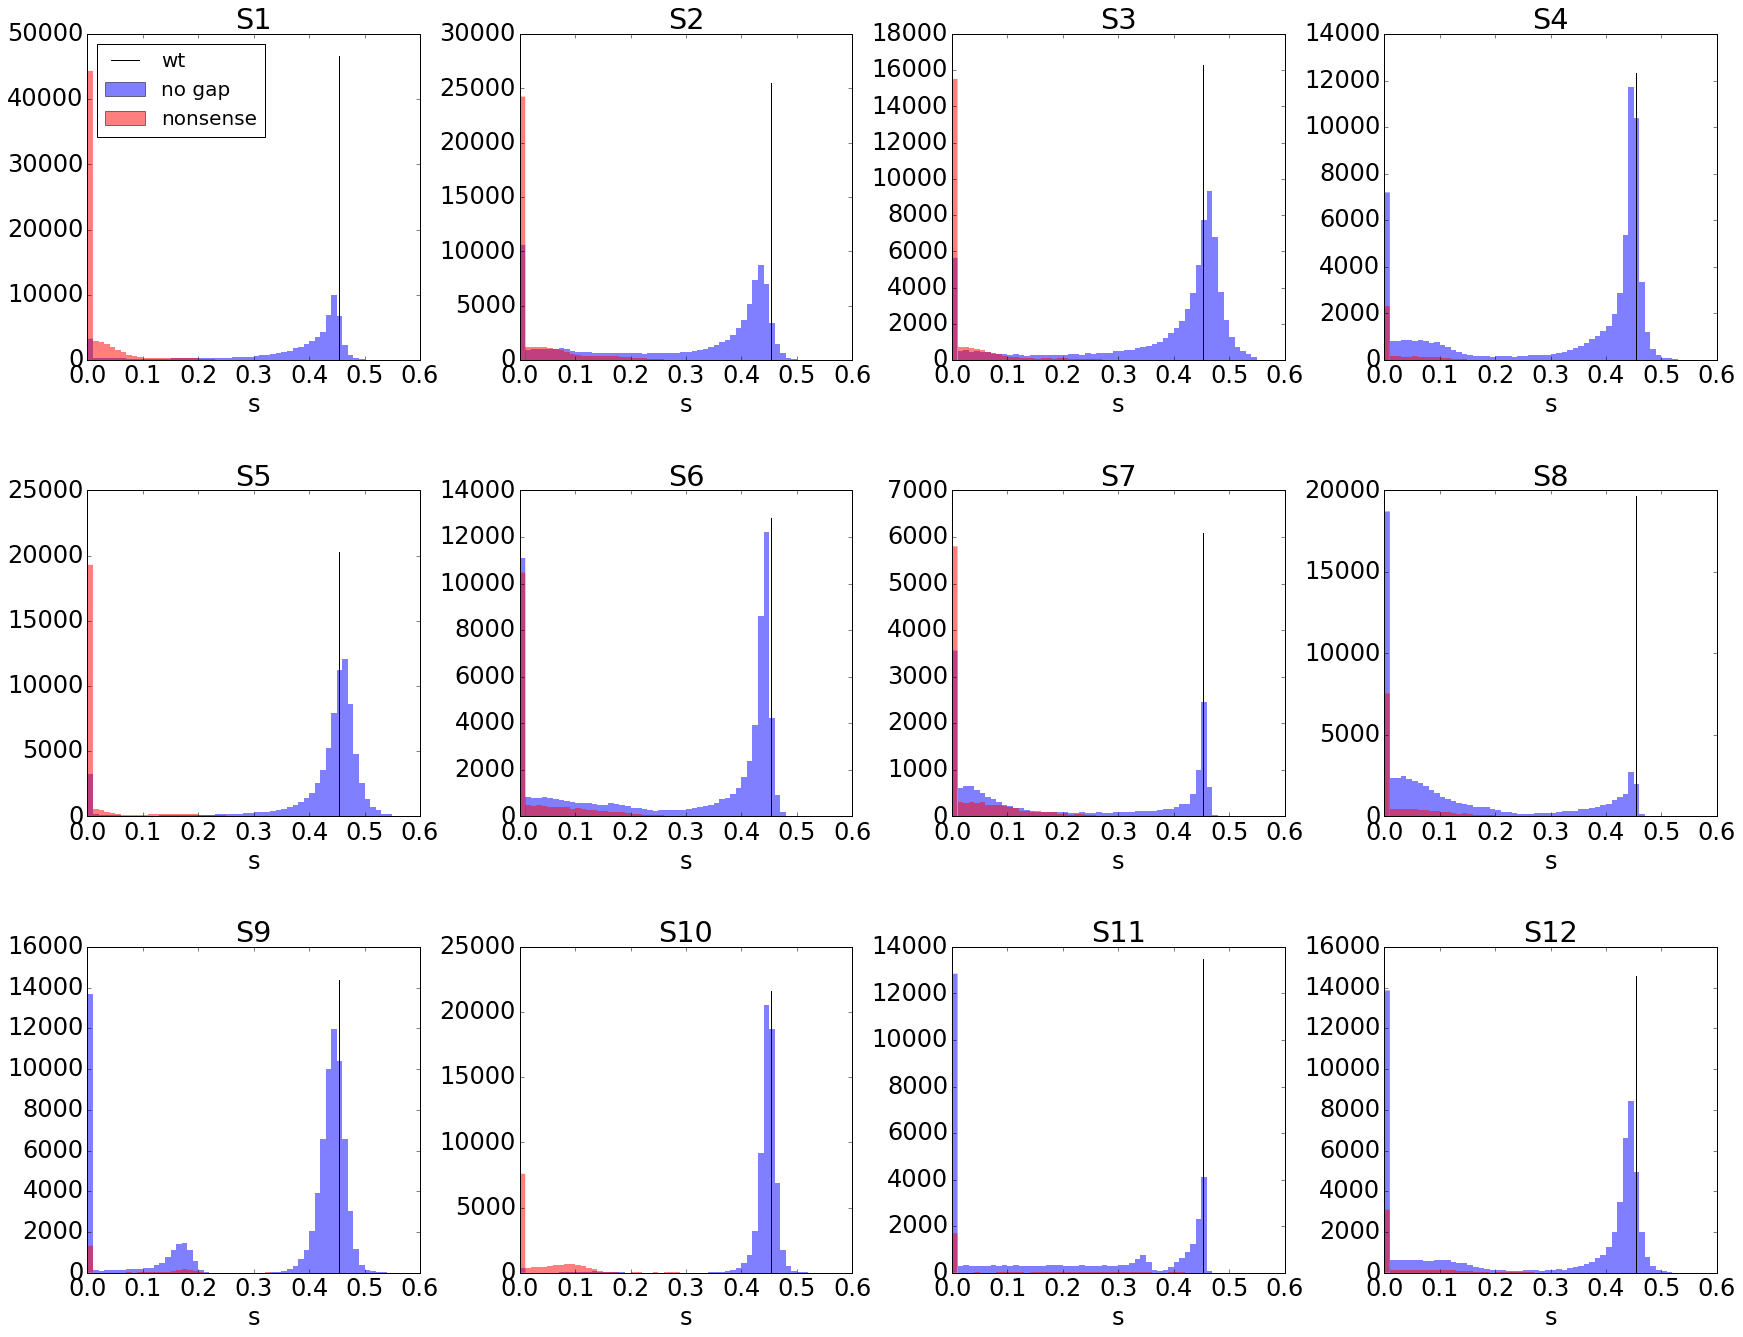

In [89]:
#histogram of t0_fr
fig=plt.figure(figsize=(4*7.3,3*7.4))
plt.rcParams.update({'font.size': 24,'legend.fontsize': 20})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)
count=1
for s in segm_set:
    plt.subplot(3,4,count)
    mask=aa_all[s][(aa_all[s]['nonsense']==0)]
    a1,b1,c1=plt.hist(mask['s'],range=(0,0.55),bins=55,alpha=0.5,edgecolor='none',color='b',label='no gap')
    
    mask=aa_all[s][(aa_all[s]['nonsense']==1)]
    a2,b2,c2=plt.hist(mask['s'],range=(0,0.55),bins=55,alpha=0.5,edgecolor='none',color='red',label='nonsense')
    plt.title('S'+str(s))
    plt.xlabel('s')
    plt.plot([wt_abs_fitness,wt_abs_fitness],[0,1.05*max([max(a1),max(a2)])],c='black',label='wt')
    if (s==1):
        plt.legend(loc=2)
    count+=1

In [90]:
for s in segm_set:
    aa_all[s].to_csv(data_folder+'/S'+str(s)+'_scaled.csv',sep='\t',index=False)